## <center> Capstone Project 1 Draft <center>

This is the first capstone project for Springboard Data Science Online bootcamp. Data from the Kaggle [Credit Card Fraud Detiction](https://www.kaggle.com/c/ieee-fraud-detection). The first thing I want to know is learn more about my data and answer the following questions:
1. Can I count something interesting?
2. Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
3. Can I make a bar plot or a histogram?
4. Can I compare two related quantities?
5. Can I make a scatterplot?
6. Can I make a time-series plot?
7. Looking at the plots, what are some insights I can make? Do I see any correlations? Is there a hypothesis to investigate further? What other questions do the insights lead to?
8. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships will make the story more complete?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

test_identity = pd.read_csv('data/test_identity.csv')
test_transaction = pd.read_csv('data/test_transaction.csv')
train_identity = pd.read_csv('data/train_identity.csv')
train_transaction = pd.read_csv('data/train_transaction.csv')

In [5]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
print(train_transaction.addr2.value_counts())

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
55.0         1
79.0         1
49.0         1
50.0         1
70.0         1
Name: addr2, Length: 74, dtype: int64


In [17]:
train_transaction.M9.head(10)

0    NaN
1    NaN
2      F
3    NaN
4    NaN
5    NaN
6      T
7    NaN
8    NaN
9    NaN
Name: M9, dtype: object

According to the transaction dataframe shown above:
1. TransactionDT: timedelta from a given reference datetime (not an actual timestamp. (TransactionDT first value is 86400, which corresponds to the number of seconds in a day (60 * 60 * 24 = 86400) so the unit is seconds. The maximum value of TransactionDT is 15811131, so the data if from 183 days)
2. TransactionAmt: transaction payment amount in USD
3. ProductCD: product code, the product for each transaction.(The product purchased in this transaction, it can be any kind of products such as a service.)
4. card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
5. addr1: billing region, I think it's the area code, first three number of zip code.
6. addr2: billing country
7. dist: distance. (distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.)
8. P_emaildomain: purchase email domain. (gmail.com, yahoo.com, other)
9. R_emaildomain: recipient email domain. (gmail.com, null, other)
10. C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
11. D1-D15: timedelta, such as days between previous transaction, etc.
12. M1-M9: match, such as names on card and address, etc.
13. Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations. (For example, how many times the payment card associated with a IP and email or address appeared in 24 hours time range, etc.)

In [8]:
print(train_transaction.TransactionDT.max())
print(15811131/86400)

15811131
182.99920138888888


In [18]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


According to the identity dataframe above:
1. Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
2. id_01 to id_20: are collected from Vesta
3. id_21 to id_30: are collected from sourceA
4. id_31 to id_38: are collected from sourceB
5. id_30: different systems such as ios or windows
6. id_31: browsers such as chrome or safari.
7. DeviceType: mobile or desktop.
8. DeviceInfo: 

In [63]:
print(test_identity.shape)
print(test_transaction.shape)
print(train_identity.shape)
print(train_transaction.shape)

(141907, 41)
(506691, 393)
(144233, 41)
(590540, 394)


In [65]:
print(test_identity.DeviceType.value_counts())
print(test_identity.DeviceInfo.value_counts())

desktop    74403
mobile     62528
Name: DeviceType, dtype: int64
Windows        44988
iOS Device     18720
MacOS          11149
Trident/7.0     4890
rv:11.0          749
               ...  
A622GL             1
LGL62VL            1
TechPad_10Y        1
SM-S320VL          1
LG-H831            1
Name: DeviceInfo, Length: 2226, dtype: int64


In [66]:
print(train_identity.DeviceInfo.isna().sum())

25567


In [67]:
print(train_transaction.isFraud.isna().sum())

0


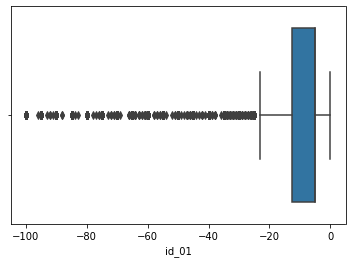

In [70]:
sns.boxplot(x=test_identity['id_01'])